<a href="https://colab.research.google.com/github/elka97/DataAnalysisAlgoritms/blob/main/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [135]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [136]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    errors=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X)) 
        errors.append(err)       
        if i % (iterations / 10) == 0:
            print(i, w, err)
            # errors.append(err)
    return w, errors


## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)
# mini-batch GD & SGD
def eval_SGD(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    errors=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)) 
        errors.append(err)           
        if i % (iterations / 10) == 0:
            print(i, w, err)
            # errors.append(err)
    return w, errors

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.


In [ ]:
from sklearn import datasets
X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)
# X, y

In [138]:
coef

array([87.73730719, 74.07686178])

In [139]:
# веса по МНК
w_mnk = np.linalg.inv(X.T @ X) @ X.T @ y
w_mnk

array([86.85290273, 74.10093365])

In [141]:
w_gd, errors_gd = eval_GD(X, y, iterations=1500, alpha=1e-2)
y_pred_gd = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred_gd)
print(f'метод градиентного спуска MSE: {err_gd}')

150 [77.98812456 70.84245251] 101.00012031045402
300 [85.91949688 73.98513742] 29.447749543149772
450 [86.75340147 74.10013615] 28.772456569533812
600 [86.84223393 74.10142749] 28.764997644042502
750 [86.85175568 74.10101565] 28.76491196572977
900 [86.85277925 74.10094392] 28.764910973046263
1050 [86.85288943 74.10093483] 28.76491096152363
1200 [86.85290129 74.10093378] 28.76491096138981
1350 [86.85290257 74.10093367] 28.764910961388278
1500 [86.85290271 74.10093366] 28.76491096138825
метод градиентного спуска MSE: 28.764910961388246


In [142]:
w_sgd, errors_sgd = eval_SGD(X, y, iterations=1500, alpha=1e-2)
y_pred_sgd = np.dot(X, w_sgd)
err_sgd = calc_mse(y, y_pred_sgd)
print(f'метода стохастического градиентного спуска MSE: {err_sgd}')

150 [77.84258528 70.73232112] 0.07772996897757038
300 [85.88816005 73.97410809] 18.898467101200865
450 [86.74743558 74.09824587] 21.786908827353905
600 [86.84040988 74.10004652] 22.02630064872282
750 [86.85053277 74.09964131] 22.048028812300316
900 [86.85163819 74.09956618] 22.050175347567993
1050 [86.85175907 74.09955638] 22.05039846195725
1200 [86.85177229 74.09955523] 22.050422281415234
1350 [86.85177374 74.0995551 ] 22.050424858202103
1500 [86.8517739  74.09955508] 22.050425138735097
метода стохастического градиентного спуска MSE: 28.76491385574897


In [ ]:
# len(errors_gd), len(errors_sgd)

Text(0, 0.5, 'MSE')

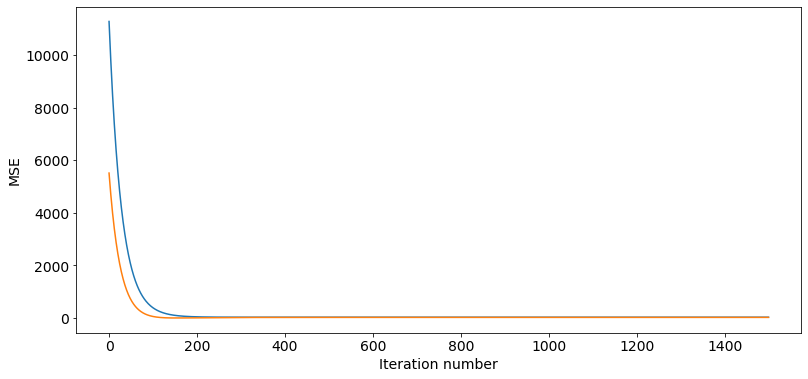

In [144]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(errors_gd, alpha=1)
plt.plot(errors_sgd, alpha=1)
plt.xlabel('Iteration number')
plt.ylabel('MSE')

GD сошелся после 250 итераций +-, стохастический после 150.
Stochastic GD faster

2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.

In [145]:
# Метод градиентного спуска + регуляризация - Ridge
def eval_GD_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    errors=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w) 
        errors.append(err)       
        if i % (iterations / 10) == 0:
            print(i, w, err)
            # errors.append(err)
    return w, errors

## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD) + регуляризация - Ridge
# mini-batch GD & SGD
def eval_SGD_reg2(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    errors=[]
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)+ 2 * lambda_ * w) 
        errors.append(err)           
        if i % (iterations / 10) == 0:
            print(i, w, err)
            # errors.append(err)
    return w, errors

In [146]:
lambda_reg2=1e-2

In [147]:
w_gd_reg2, errors_gd_reg2 = eval_GD_reg2(X, y, iterations=1500, alpha=1e-2, lambda_=lambda_reg2)
y_pred_gd_reg2 = np.dot(X, w_gd_reg2)
err_gd_reg2 = calc_mse(y, y_pred_gd_reg2)
print(f'веса s L2 регуляризаци для метода градиентного спуска: {w_gd_reg2} MSE: {err_gd_reg2} lambda: {lambda_reg2}\n\n')

w_gd_reg2, errors_gd_reg2 = eval_GD_reg2(X, y, iterations=1500, alpha=1e-2, lambda_=0)
y_pred_gd_reg2 = np.dot(X, w_gd_reg2)
err_gd_reg2 = calc_mse(y, y_pred_gd_reg2)
print(f'веса без L2 регуляризации веса для метода градиентного спуска: {w_gd_reg2} MSE: {err_gd_reg2} lambda: {lambda_reg2}\n')

150 [77.23186057 70.2545053 ] 116.0094201822771
300 [84.84966448 73.27769223] 32.52355186048436
450 [85.62655069 73.38503449] 30.427347826390022
600 [85.70682584 73.38621014] 30.279763485689823
750 [85.71517223 73.38584949] 30.265706428001533
900 [85.71604253 73.38578852] 30.264281778952608
1050 [85.7161334  73.38578102] 30.26413478343869
1200 [85.7161429  73.38578019] 30.264119507849095
1350 [85.71614389 73.38578009] 30.264117915365464
1500 [85.71614399 73.38578009] 30.264117749106
веса s L2 регуляризаци для метода градиентного спуска: [85.71614399 73.38578009] MSE: 30.26411774881612 lambda: 0.01


150 [77.98812456 70.84245251] 101.00012031045402
300 [85.91949688 73.98513742] 29.447749543149772
450 [86.75340147 74.10013615] 28.772456569533812
600 [86.84223393 74.10142749] 28.764997644042502
750 [86.85175568 74.10101565] 28.76491196572977
900 [86.85277925 74.10094392] 28.764910973046263
1050 [86.85288943 74.10093483] 28.76491096152363
1200 [86.85290129 74.10093378] 28.76491096138981
13

In [148]:
w_sgd_reg2, errors_sgd_reg2 = eval_SGD_reg2(X, y, iterations=1500, alpha=1e-2, lambda_=lambda_reg2)
y_pred_sgd_reg2 = np.dot(X, w_sgd_reg2)
err_sgd_reg2 = calc_mse(y, y_pred_sgd_reg2)
print(f'веса s L2 регуляризаци для метода стохастического градиентного спуска: {w_sgd_reg2} MSE: {err_sgd_reg2} lambda: {lambda_reg2}\n\n')

w_sgd_reg2, errors_sgd_reg2 = eval_SGD_reg2(X, y, iterations=1500, alpha=1e-2, lambda_=0)
y_pred_sgd_reg2 = np.dot(X, w_sgd_reg2)
err_sgd_reg2 = calc_mse(y, y_pred_sgd_reg2)
print(f'веса без L2 регуляризации веса для стохастического метода градиентного спуска: {w_sgd_reg2} MSE: {err_sgd_reg2} lambda: {lambda_reg2}\n')

150 [37.17328539 37.33307585] 1365.8608898264745
300 [37.36204527 37.41945754] 1357.2537886020298
450 [37.36304544 37.4196289 ] 1357.224756168948
600 [37.36305082 37.41962907] 1357.2246432044415
750 [37.36305084 37.41962907] 1357.2246427039233
900 [37.36305084 37.41962907] 1357.2246427014932
1050 [37.36305084 37.41962907] 1357.224642701467
1200 [37.36305084 37.41962907] 1357.224642701467
1350 [37.36305084 37.41962907] 1357.224642701467
1500 [37.36305084 37.41962907] 1357.224642701467
веса s L2 регуляризаци для метода градиентного спуска: [37.36305084 37.41962907] MSE: 3255.1566151402467 lambda: 0.01


150 [77.84258528 70.73232112] 0.07772996897757038
300 [85.88816005 73.97410809] 18.898467101200865
450 [86.74743558 74.09824587] 21.786908827353905
600 [86.84040988 74.10004652] 22.02630064872282
750 [86.85053277 74.09964131] 22.048028812300316
900 [86.85163819 74.09956618] 22.050175347567993
1050 [86.85175907 74.09955638] 22.05039846195725
1200 [86.85177229 74.09955523] 22.05042228141523

С L2 регуляризацией SGD не всегда сходится на 1500 итерациях, +растет ошибка